In [1]:
%conda install matplotlib -y
%pip install gdown
%conda install xgboost -y
%pip install graphviz
%conda install graphviz -y

import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Solving envi

# Random Forest, XG Boost, feature importance - practice
Goal: Create Random forest-based models and XGBoost-based models

## Classifying Wine

The following is data containing several pieces of information related to wine and whether it is drinkable. Predict the type ('target') using Random forest and XGBoost, but achieve at least 90% accuracy.  
Also indicate the feature importance.

In [2]:
raw_wine = datasets.load_wine()
wine = pd.DataFrame(raw_wine['data'], index=raw_wine['target'], columns=raw_wine['feature_names'])
wine = wine.reset_index(names=['target'] + raw_wine['feature_names'])
display(wine)

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
# Preprocessing
X = wine.iloc[:, 1:].values
y = wine.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
print(f"Training X: {X_train}\n Training Y: {y_train}")

Training X: [[ 0.85156946  0.82912808  0.63414004 ...  0.01119018 -1.11821035
  -0.21302116]
 [-0.38369551 -0.72382916 -0.38935541 ...  0.01119018 -0.77922407
  -0.8021525 ]
 [-1.70542902 -0.31090412 -0.3162486  ...  0.88865792  0.49197446
  -1.27982657]
 ...
 [-0.71721705 -0.65201611 -0.64522928 ...  0.44992405  0.49197446
  -1.27982657]
 [ 1.1109751  -0.58917969 -0.90110314 ... -0.20817676  1.01457831
   0.75824943]
 [ 1.43214399  0.15588072  0.41481959 ... -1.48050498 -1.27357906
  -0.27671104]]
 Training Y: [2 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2 0 1 2 2 1 2 2 0 1 2 1 1 2 1 0 1 1 1 0
 0 1 1 2 2 1 1 1 2 2 0 2 1 1 1 1 1 0 0 1 0 2 0 2 0 0 1 0 1 1 0 2 1 0 1 1 1
 2 0 2 2 0 0 1 2 0 0 1 1 0 0 0 2 1 0 1 2 0 1 2 2 0 0 2 0 2 1 0 0 1 0 2 1 2
 0 2 2 2 0 1 1 1 1 2 2 1 1 0 1 2 2 0 0 2 1 1 1 0 0 0 1 1 1 0 2]


In [5]:
# Training and Predictions
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



In [6]:
print(f"{classifier.feature_importances_}")

[0.08310757 0.01506007 0.0141666  0.03221837 0.02387763 0.05535999
 0.17108265 0.02031243 0.0207199  0.2145723  0.0714625  0.14991062
 0.12814936]


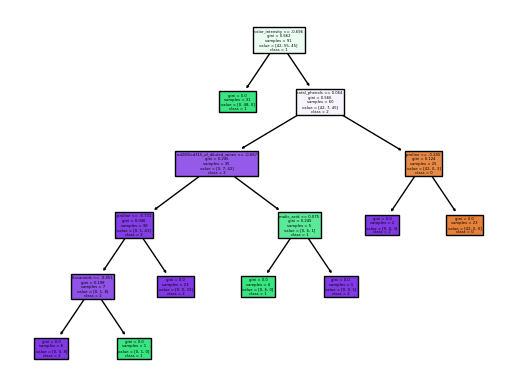

In [7]:
from sklearn import tree

for tree_in_forest in classifier.estimators_:
    tree.plot_tree(tree_in_forest,
               feature_names = list(wine.columns[1:]), 
               class_names=list(map(lambda x: str(x), list(wine['target'].drop_duplicates()))),
               filled = True)

In [8]:
list(wine.columns)

['target',
 'alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
new_columns_names =['target',
 'alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

<Axes: >

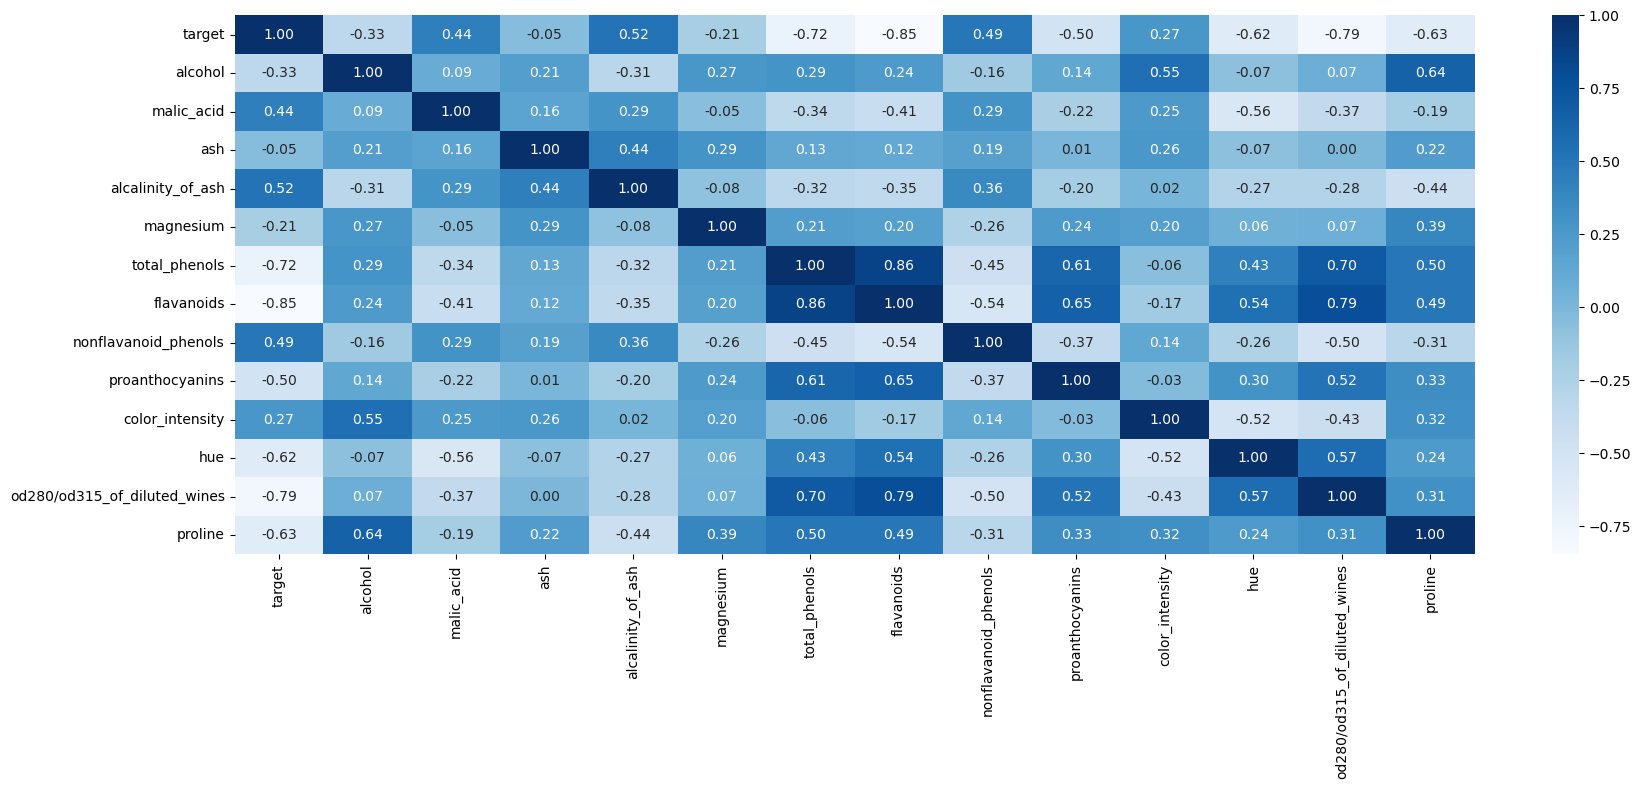

In [10]:
corr = wine[new_columns_names].corr() 
plt.figure(figsize=(20,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")

In [11]:
compact_columns_names =['target',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines']

In [13]:
train, test = train_test_split(wine, test_size=.2, random_state=2)
train_X = train[compact_columns_names]
train_Y = train["target"]

test_X = test[compact_columns_names]
test_Y = test["target"]

rf_classifier = RandomForestClassifier()
rf_classifier.fit(train_X, train_Y)

rf_accuracy = rf_classifier.score(test_X, test_Y)

print(f"Random Forest accuracy: {rf_accuracy}")

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(train_X, train_Y)

xgb_accuracy = xgb_classifier.score(test_X, test_Y)

print(f"XGBoost accuracy: {xgb_accuracy}")

Random Forest accuracy: 1.0
XGBoost accuracy: 1.0
